In [1]:
ls

Applications/                   Untitled.ipynb
Desktop/                        Untitled1.ipynb
Documents/                      Untitled2.ipynb
Downloads/                      Untitled3.ipynb
Facebook_scraping.ipynb         Untitled4.ipynb
Facebook_test3.ipynb            Untitled5.ipynb
Fraud Detection Practice.ipynb  Web Scraping-Copy1.ipynb
GoogleAPI.ipynb                 Web Scraping.ipynb
Instagram.ipynb                 face_2test.ipynb
Interview Practice.ipynb        ileana-git-test/
Library/                        justin_folder/
Movies/                         nltk_data/
Music/                          price_analytics/
Pictures/                       src/
Public/                         tweets.txt
Teradata-import.ipynb           webscrape_venv/


In [2]:
cd Desktop/

/Users/ileanacabada/Desktop


In [3]:
ls

$RECYCLE.BIN/
CABADA_ILEANASWUFEDISSERTATION.pdf
CabadaArnoldo_Resume.docx
CabadaArnoldo_Resume.pdf
CabadaIleana_resume122019.pdf
CabadaIleana_resumeAML_2019.pdf
CabadaIleana_resume_fa.pdf
Cabada_Modelingsample.pdf
Data/
Equal Opportunity Publications - Stem Registration Confirm Page_files/
Old Firefox Data/
Peru/
Professional Portfolio/
Screen Shot 2019-10-14 at 8.38.32 PM.png
Screen Shot 2019-10-15 at 7.53.12 PM.png
Screen Shot 2019-10-20 at 10.11.49 PM.png
Screen Shot 2019-10-20 at 10.20.26 PM.png
Screen Shot 2019-10-20 at 10.21.25 PM.png
Screen Shot 2019-10-20 at 10.21.52 PM.png
Screen Shot 2019-10-20 at 10.26.28 PM.png
Screen Shot 2019-10-25 at 12.41.23 PM.png
Screen Shot 2019-11-08 at 10.25.11 AM.png
Thumbs.db
Untitled.pages*
amazon.csv*
breweries_us.csv*
chapter_1 4/
creditcard_sampledata.csv
creditcard_sampledata_3.csv
curriculum english 2019.pages*
desktop.ini
facepy-1.0.9/
fall.jpg
minie.jpg
peru face/
photos/
price_optimization.pdf
resume portfolio/
untitled folder/


In [4]:
# Import pandas and read csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.feature_selection import VarianceThreshold

df = pd.read_csv("creditcard_sampledata.csv")

# Explore the features available in your dataframe
print(df.info())

# Count the occurrences of fraud and no fraud and print them
occ = df['Class'].value_counts()
print(occ)

# Print the ratio of fraud cases
print( occ/ len(df.index))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8000 entries, 0 to 7999
Data columns (total 32 columns):
Unnamed: 0    8000 non-null int64
Time          8000 non-null int64
V1            8000 non-null float64
V2            8000 non-null float64
V3            8000 non-null float64
V4            8000 non-null float64
V5            8000 non-null float64
V6            8000 non-null float64
V7            8000 non-null float64
V8            8000 non-null float64
V9            8000 non-null float64
V10           8000 non-null float64
V11           8000 non-null float64
V12           8000 non-null float64
V13           8000 non-null float64
V14           8000 non-null float64
V15           8000 non-null float64
V16           8000 non-null float64
V17           8000 non-null float64
V18           8000 non-null float64
V19           8000 non-null float64
V20           8000 non-null float64
V21           8000 non-null float64
V22           8000 non-null float64
V23           8000 non-null float

In [5]:
df.isnull().values.any()
df.isnull().sum()

Unnamed: 0    0
Time          0
V1            0
V2            0
V3            0
V4            0
V5            0
V6            0
V7            0
V8            0
V9            0
V10           0
V11           0
V12           0
V13           0
V14           0
V15           0
V16           0
V17           0
V18           0
V19           0
V20           0
V21           0
V22           0
V23           0
V24           0
V25           0
V26           0
V27           0
V28           0
Amount        0
Class         0
dtype: int64

#remeber to normalize your data before applying Variance Threshold
def variance_threshold_selector(independent_columns, variance):
    selector = VarianceThreshold(threshold=variance)
    selector.fit(independent_columns)
    return independent_columns[independent_columns.columns[selector.get_support(indices=True)]]

a=variance_threshold_selector(df,0.1)

a.columns

x=variance_threshold_selector(df,0.9)

In [22]:
import numpy as np    
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
import pandas as pd
import matplotlib.pyplot as plt

x=df.iloc[:,:-1]
y= df.iloc[:,-1]

#Scale your data prior to your fit thus making the coefficients comparable, and use transform in order to  select the best features

def X_scaled_selector(data):
    scaler = StandardScaler()
    scaler.fit(data)
    return pd.DataFrame(scaler.transform(data),columns = data.columns)
    #return data[data.columns[scaler.get_support(indices=True)]]

In [7]:
X_scaled= X_scaled_selector(x)

X_scaled=x

In [8]:
clf = LogisticRegression(random_state = 0)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y,  train_size=0.3,random_state=0)

/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:2026: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [9]:
clf.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [10]:
y_predicted= clf.predict(X_test)

In [20]:
clf.score(X_train, y_train) #is the training accuracy

0.9991666666666666

In [23]:
accuracy_score(y_test, y_predicted) #is the testing accuracy.

0.9978571428571429

In [11]:
#Compare y_test to predictions and obtain performance metrics
print('Classification report:\n', classification_report(y_test, y_predicted))
conf_mat = confusion_matrix(y_true=y_test, y_pred=y_predicted)
print('Confusion matrix:\n', conf_mat)

Classification report:
              precision    recall  f1-score   support

          0       1.00      1.00      1.00      5586
          1       0.75      0.21      0.33        14

avg / total       1.00      1.00      1.00      5600

Confusion matrix:
 [[5585    1]
 [  11    3]]


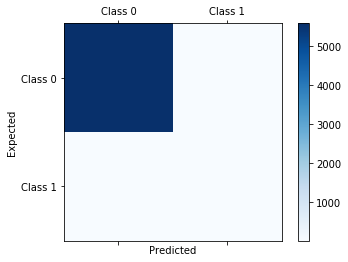

In [12]:
labels = ['Class 0', 'Class 1']
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(conf_mat, cmap=plt.cm.Blues)
fig.colorbar(cax)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted')
plt.ylabel('Expected')
plt.show()

In [13]:
feature_importance = abs(clf.coef_[0])
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5

In [14]:
columns=np.array(x.columns)[sorted_idx]

In [15]:
columns

array(['V4', 'V27', 'V21', 'V13', 'Time', 'V10', 'V19', 'V15', 'V22',
       'V23', 'Unnamed: 0', 'V25', 'V26', 'V18', 'V24', 'V12', 'V2',
       'V28', 'V3', 'V7', 'V6', 'V9', 'V11', 'V17', 'V8', 'V1', 'Amount',
       'V20', 'V16', 'V5', 'V14'], dtype=object)

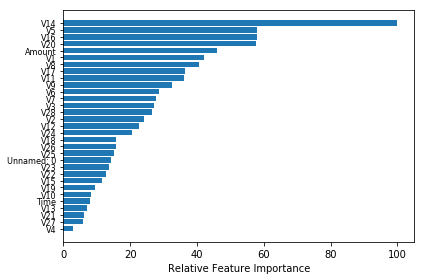

In [16]:
#Gradient Boosting regression
featfig = plt.figure()
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center')
featax.set_yticks(pos)
featax.set_yticklabels(np.array(x.columns)[sorted_idx], fontsize=8)
featax.set_xlabel('Relative Feature Importance')

plt.tight_layout()   
plt.show()